In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
charg_set = pd.read_csv("charging_sessions.csv", parse_dates=["connectionTime","disconnectTime","doneChargingTime"])

In [49]:
weather_set = pd.read_csv("weather_burbank_airport.csv", parse_dates=["timestamp"])

In [50]:
charg_set

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [51]:
charg_set.describe()

,Unnamed: 0,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [52]:
charg_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        66450 non-null  int64              
 1   id                66450 non-null  object             
 2   connectionTime    66450 non-null  datetime64[ns, UTC]
 3   disconnectTime    66450 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      66450 non-null  float64            
 6   sessionID         66450 non-null  object             
 7   siteID            66450 non-null  int64              
 8   spaceID           66450 non-null  object             
 9   stationID         66450 non-null  object             
 10  timezone          66450 non-null  object             
 11  userID            49187 non-null  float64            
 12  userInputs        49187 non-null  object             
dtypes

In [53]:
weather_set

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [54]:
weather_set.describe()

,timestamp,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29244,29219.000000,29224.000000,29236.000000,29158.000000,29244.000000,29218.000000
mean,2019-06-29 23:51:42.252770048,17.885622,30.107993,986.879400,8.566568,0.059360,17.731433
min,2018-01-01 08:53:00,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,2018-10-06 05:38:00,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,2019-06-24 00:23:00,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,2020-03-25 20:08:00,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,2021-01-01 07:53:00,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000
std,NaN,6.454604,5.400388,3.607065,6.699889,0.471682,6.321100


In [55]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


Categorical attributes of "cloud_cover_description" have to be tranformed to boolean representations.

In [66]:
weather_set["cloud_cover_description"].value_counts()

cloud_cover_description
Fair                       17122
Cloudy                      4936
Partly Cloudy               2668
Mostly Cloudy               1830
Light Rain                   896
Haze                         579
Smoke                        329
Fog                          325
Rain                         247
Heavy Rain                   120
Fair / Windy                  74
T-Storm                       18
Thunder in the Vicinity       17
Partly Cloudy / Windy         14
Light Rain / Windy            10
Mostly Cloudy / Windy         10
Cloudy / Windy                 9
Heavy Rain / Windy             7
Blowing Dust                   5
Heavy T-Storm                  4
Rain / Windy                   2
Thunder                        1
Light Rain with Thunder        1
Name: count, dtype: int64

In [64]:
pd.get_dummies(weather_set["cloud_cover_description"])

,Blowing Dust,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Heavy Rain / Windy,Heavy T-Storm,...,Mostly Cloudy,Mostly Cloudy / Windy,Partly Cloudy,Partly Cloudy / Windy,Rain,Rain / Windy,Smoke,T-Storm,Thunder,Thunder in the Vicinity
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29239,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29240,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29241,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29242,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Calculate the average connection and charging times.

In [56]:
charg_set["connectionDuration"] = charg_set["disconnectTime"] - charg_set["connectionTime"]

In [57]:
charg_set["chargingDuration"] = charg_set["doneChargingTime"] - charg_set["connectionTime"]

Utilization: chargin time/total connection time

In [58]:
charg_set["utilization"] = charg_set["chargingDuration"] / charg_set["connectionDuration"]

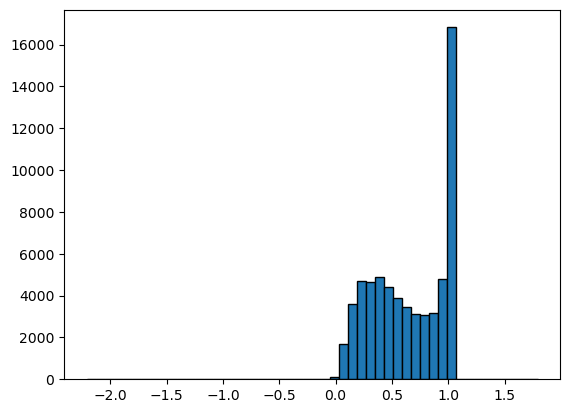

In [59]:
data = charg_set["utilization"]

plt.hist(data, bins=50, edgecolor='k')
plt.show()

In [60]:
charg_set.describe()

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,utilization
count,66450.000000,66450.000000,66450.000000,49187.000000,66450,62362,62362.000000
mean,4726.102062,11.787916,1.472656,1800.494582,0 days 06:17:34.578209179,0 days 03:32:28.611109329,0.647598
std,3568.025394,10.314789,0.499256,2617.548614,0 days 04:51:41.391314114,0 days 03:03:19.652032849,0.313831
min,0.000000,0.501000,1.000000,1.000000,0 days 00:02:04,-1 days +23:18:38,-2.210151
25%,1845.000000,5.097000,1.000000,431.000000,0 days 02:51:57.750000,0 days 01:38:02,0.364974
50%,3960.000000,9.140000,1.000000,818.000000,0 days 06:11:44,0 days 02:47:01.500000,0.666440
75%,7027.000000,14.183000,2.000000,1805.000000,0 days 09:13:31.500000,0 days 04:44:41.750000,0.996550
max,15291.000000,108.797242,2.000000,19923.000000,10 days 05:16:09,8 days 08:00:57,1.792245


Assumption: utilization cannot be greater than one, so replace for the entries > 1 with = 1

In [61]:
charg_set[charg_set["utilization"] > 1]

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connectionDuration,chargingDuration,utilization
12,12,5e23b149f9af8b5fe4b973db,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0,"[{'WhPerMile': 250, 'kWhRequested': 50.0, 'mil...",0 days 07:04:01,0 days 07:04:58,1.002240
20,20,5e23b149f9af8b5fe4b973e3,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mil...",0 days 03:33:07,0 days 03:34:04,1.004458
25,25,5e23b149f9af8b5fe4b973e8,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,America/Los_Angeles,474.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil...",0 days 06:16:40,0 days 06:17:37,1.002522
26,26,5e23b149f9af8b5fe4b973e9,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,America/Los_Angeles,724.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",0 days 00:38:13,0 days 00:39:10,1.024858
33,33,5e23b149f9af8b5fe4b973f0,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,America/Los_Angeles,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mil...",0 days 02:15:06,0 days 02:16:03,1.007032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66432,10070,5d574ad2f9af8b4c10c03645,2019-07-31 14:36:02+00:00,2019-07-31 22:34:10+00:00,2019-07-31 22:35:10+00:00,9.459,1_1_191_803_2019-07-31 14:36:02.181346,1,AG-4F49,1-1-191-803,America/Los_Angeles,826.0,"[{'WhPerMile': 250, 'kWhRequested': 35.0, 'mil...",0 days 07:58:08,0 days 07:59:08,1.002091
66439,10077,5d574ad2f9af8b4c10c0364c,2019-07-31 14:45:02+00:00,2019-07-31 23:43:20+00:00,2019-07-31 23:44:19+00:00,8.289,1_1_191_804_2019-07-31 14:45:01.555937,1,AG-4F34,1-1-191-804,America/Los_Angeles,572.0,"[{'WhPerMile': 231, 'kWhRequested': 9.24, 'mil...",0 days 08:58:18,0 days 08:59:17,1.001827
66440,10078,5d574ad2f9af8b4c10c0364d,2019-07-31 14:45:29+00:00,2019-07-31 22:01:32+00:00,2019-07-31 22:02:32+00:00,31.376,1_1_191_811_2019-07-31 14:45:29.388046,1,AG-4F42,1-1-191-811,America/Los_Angeles,1626.0,"[{'WhPerMile': 200, 'kWhRequested': 38.0, 'mil...",0 days 07:16:03,0 days 07:17:03,1.002293
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",0 days 05:21:14,0 days 05:22:14,1.003113


In [62]:
charg_set[charg_set["utilization"] < 0].describe()

,Unnamed: 0,kWhDelivered,siteID,userID,connectionDuration,chargingDuration,utilization
count,27.000000,27.000000,27.000000,6.000000,27,27,27.000000
mean,7871.481481,2.479419,1.962963,889.500000,0 days 08:55:52.222222222,-1 days +23:55:03.370370371,-0.186907
std,4599.043374,3.555755,0.192450,421.951538,0 days 14:04:59.951537174,0 days 00:11:47.666867962,0.583318
min,492.000000,0.521000,1.000000,483.000000,0 days 00:18:43,-1 days +23:18:38,-2.210151
25%,3395.000000,0.815942,2.000000,527.000000,0 days 03:35:54,-1 days +23:59:00,-0.004516
50%,9082.000000,1.067230,2.000000,857.000000,0 days 05:22:24,-1 days +23:59:01,-0.002939
75%,11650.000000,1.707816,2.000000,1154.000000,0 days 07:17:57.500000,-1 days +23:59:02.500000,-0.001970
max,13406.000000,14.967000,2.000000,1470.000000,2 days 22:59:52,-1 days +23:59:59,-0.000051


Assumption: negative utilization is due to time changes

Since the UserID and userInputs have valid charging data, even though they have missing values, the entries will be kept in the dataset.